In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist_data = pd.read_csv("mnist_test.csv")
np.random.seed(0)
mnist = pd.DataFrame(columns=mnist_data.columns, dtype='int64')
for i in range(10):
    samples = mnist_data[mnist_data.label==i].sample(50, replace=False)
    mnist = pd.concat([mnist, samples], ignore_index=True)

mnist.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
mnist_fea = mnist.drop('label', axis = 1)
mnist_label = mnist['label']
mnist_fea.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
average=mnist.groupby('label').mean()

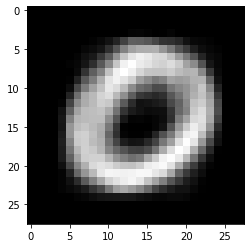

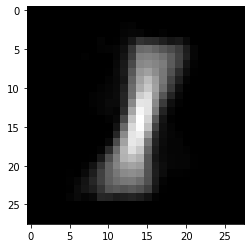

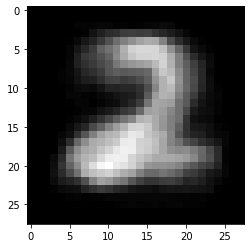

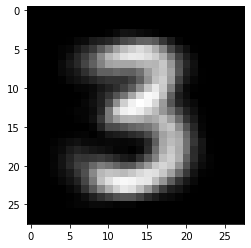

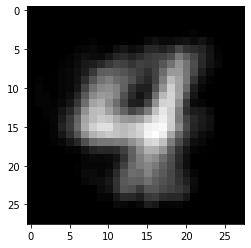

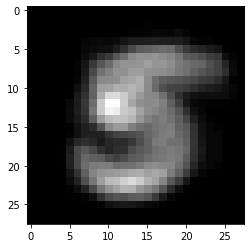

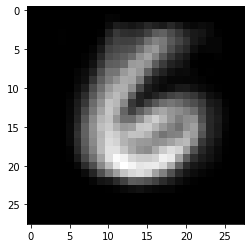

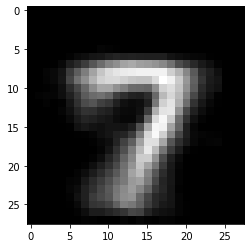

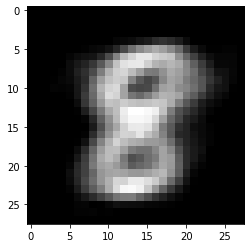

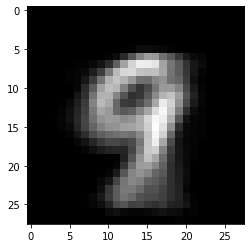

In [148]:
for i in range(10):
    plt.imshow(average.iloc[i].values.reshape((28,28)), cmap='gray')
    plt.show()

In [150]:
def to_matrix(arr):
    mat = arr.reshape(28, 28)
    return mat

def to_coord(arr, t=0):
    dig = np.transpose(np.where(to_matrix(arr) > t))
    dig[:, [0, 1]] = dig[:, [1, 0]]
    dig[:, 1] = 28 - dig[:, 1]
    dig = (dig * 100) / 28
    return dig

(0, 100)

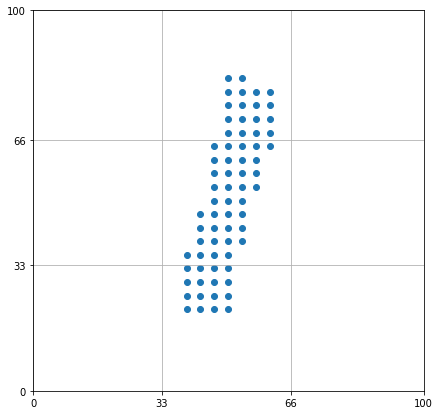

In [205]:
cor = to_coord(average.iloc[1].values, 100)
plt.figure(figsize=(7,7))
plt.scatter(cor[:,0],cor[:,1])
plt.grid()
plt.xticks([0,33,66,100])
plt.yticks([0,33,66,100])
plt.xlim((0,100))
plt.ylim((0,100))


In [243]:
def zoom(arr, t):
    p = to_coord(arr, t)
    x_min = p[:, 0].min()
    x_max = p[:, 0].max()
    y_min = p[:, 1].min()
    y_max = p[:, 1].max()
    x_mid = (x_min + x_max) / 2
    y_mid = (y_min + y_max) / 2
    p = p - [x_mid, y_mid]
    y_diff = y_max - y_min
    x_diff = x_max - x_min
    if y_diff > x_diff:
        s = y_diff
    else:
        s = x_diff
    p = p * (95 / s)
    return p + 50

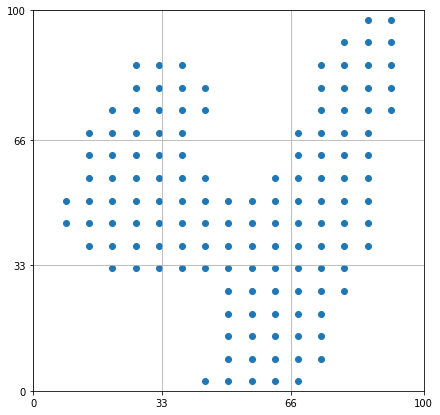

In [399]:
cord = zoom(average.iloc[4].values, 75)
plt.figure(figsize=(7,7))
plt.scatter(cord[:,0],cord[:,1])
plt.grid()
plt.xticks([0,33,66,100])
plt.yticks([0,33,66,100])
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()

In [384]:
p = cord
def points_grid(p, g):
    r,c = g
    grid_00 = p[(p[:, 0] >= 0) & (p[:, 0] < 33) & (p[:, 1] >= 66) & (p[:, 1] < 100)]
    grid_01 = p[(p[:, 0] >= 33) & (p[:, 0] < 66) & (p[:, 1] >= 66) & (p[:, 1] < 100)]
    grid_02 = p[(p[:, 0] >= 66) & (p[:, 0] < 100) & (p[:, 1] >= 66) & (p[:, 1] < 100)]
    grid_10 = p[(p[:, 0] >= 0) & (p[:, 0] < 33) & (p[:, 1] >= 33) & (p[:, 1] < 66)]
    grid_11 = p[(p[:, 0] >= 33) & (p[:, 0] < 66) & (p[:, 1] >= 33) & (p[:, 1] < 66)]
    grid_12 = p[(p[:, 0] >= 66) & (p[:, 0] < 100) & (p[:, 1] >= 33) & (p[:, 1] < 66)]
    grid_20 = p[(p[:, 0] >= 0) & (p[:, 0] < 33) & (p[:, 1] >= 0) & (p[:, 1] < 33)]
    grid_21 = p[(p[:, 0] >= 33) & (p[:, 0] < 66) & (p[:, 1] >= 0) & (p[:, 1] < 33)]
    grid_22 = p[(p[:, 0] >= 66) & (p[:, 0] < 100) & (p[:, 1] >= 0) & (p[:, 1] < 33)]
    grid = [[grid_00,grid_01,grid_02],
           [grid_10,grid_11,grid_12],
           [grid_20,grid_21,grid_22]]
    return(grid[r][c])

points_grid(p, (0,0))
# plt.plot(g[:,0], g[:,1])

array([[31.52777778, 86.94444444],
       [26.25      , 81.66666667],
       [31.52777778, 81.66666667],
       [20.97222222, 76.38888889],
       [26.25      , 76.38888889],
       [31.52777778, 76.38888889],
       [20.97222222, 71.11111111],
       [26.25      , 71.11111111],
       [31.52777778, 71.11111111]])

In [385]:
q = zoom(average.iloc[1].values, 100)
def one_grid(p, c):
    grid_0 = p[(p[:, 1] >= 0) & (p[:, 1] < 12.5)]
    grid_1 = p[(p[:, 1] >= 12.5) & (p[:, 1] < 25)]
    grid_2 = p[(p[:, 1] >= 25) & (p[:, 1] < 37.5)]
    grid_3 = p[(p[:, 1] >= 37.5) & (p[:, 1] < 50)]
    grid_4 = p[(p[:, 1] >= 50) & (p[:, 1] < 62.5)]
    grid_5 = p[(p[:, 1] >= 62.5) & (p[:, 1] < 75)]
    grid_6 = p[(p[:, 1] >= 75) & (p[:, 1] < 87.5)]
    grid_7 = p[(p[:, 1] >= 87.5) & (p[:, 1] < 100)]
    grid = [grid_0, grid_1, grid_2, grid_3, grid_4, grid_5, grid_6, grid_7]
    return(grid[c])
g = one_grid(q, 7)
# plt.plot(g[:,0], g[:,1])

In [412]:
g_0 = [(0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (0, 2)]
s_0 = [1, 1, 1, 1, 1, 1, 1, 1]
g_1 = [0, 1, 2, 3, 4, 5, 6, 7]
s_1=[1, 1, 1, 1, 1, 1, 1, 1]
g_2 = [(0, 1), (0, 2), (1, 2), (1, 1), (2, 0), (2, 1), (2, 1), (2, 2)]
s_2=[1, 1, 1, 1, 1, 1, 1, 1]
g_3 = [(0, 1), (0, 2), (1, 1), (1, 1), (1, 2), (2, 2), (2, 1), (2, 0)]
s_3=[1, 1, 1, 1, 1, 1, 1, 1]
g_4 = [(0, 0), (1, 0), (1, 0), (1, 1), (1, 2), (0, 2), (1, 2), (2, 2)]
s_4=[1, 1, 1, 1, 1, 1, 1, 1]
g_5 = [(0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (2, 1), (2, 0)]
s_5 = [1, 1, 1, 1, 1, 1, 1, 1]
g_6 = [(0, 1), (0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (1, 2), (1, 1)]
s_6 = [1, 1, 1, 1, 1, 1, 1, 1]
g_7 = [(0, 0), (0, 1), (0, 2), (0, 2), (1, 1), (1,1), (2, 1), (2, 1)]
s_7=[1, 1, 1, 1, 1, 1, 1, 1]
g_8 = [(0, 1), (0, 0), (1, 1), (2, 2), (2, 1), (2, 0), (1, 1), (0, 2)]
s_8=[1, 1, 1, 1, 1, 1, 1, 1]
g_9 = [(1, 2), (1, 1), (1, 0), (0, 0), (0, 1), (0, 2), (1, 2), (2, 1)]
s_9=[1, 1, 1, 1, 1, 1, 1, 1]


grid_digit = [g_0, g_1, g_2, g_3, g_4, g_5, g_6, g_7, g_8, g_9]
sample_type = [s_0, s_1, s_2, s_3, s_4, s_5, s_6, s_7, s_8, s_9]

grid_mid = [[[16.5, 82.5], [50, 82.5], [82.5, 82.5]],
            [[16.5, 50], [50, 50], [82.5, 50]],
            [[16.5, 16.5], [50, 16.5], [82.5, 16.5]]]
# p -> points_grid
def sample(p, mean=1):
    if len(p)==0:
        return None
    if mean:
        x_m = p[:, 0].mean()
        y_m = p[:, 1].mean()
        return [x_m, y_m]
    else:
        ind = np.random.randint(0,len(p), 1)
        return p[ind].ravel().tolist()

In [420]:
def sample_points(coord, label):
    samp = []
    if label != 1:
        for i in range(8):
            k = sample(points_grid(coord, grid_digit[label][i]), sample_type[label][i])
            if k is None:
                k = grid_mid[grid_digit[label][i][0]][grid_digit[label][i][1]]
            samp.append(k)
    else:
        for i in range(8):
            k = sample(one_grid(coord, grid_digit[label][i]), sample_type[label][i])
            samp.append(k)
    
    return np.array(samp, dtype='int64')

In [435]:
mnist_to_pen = pd.DataFrame(columns=['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4', 'x5', 'y5', 'x6', 'y6', 'x7', 'y7', 'x8', 'y8'])
for i in range(len(mnist_fea)):
    x = sample_points(zoom(mnist_fea.iloc[i].values, 1), mnist_label.iloc[i])
    mnist_to_pen.loc[i] = x.ravel()
mnist_to_pen['label'] = mnist_label
mnist_to_pen.head()
mnist_to_pen.to_csv(r'features_mnist.csv', index=False)

In [ ]:
plt.plot(x[:,0], x[:,1])
print(model.predict(x.reshape(1,16)))
plt.xlim((0,100))
plt.ylim((0,100))
plt.show()

In [415]:
from joblib import dump, load
model = load('model_tree.joblib')
model.predict(x.reshape(1,16))

array([1], dtype=int64)